In [1]:
import wandb
wandb.init(project="Timmies", entity="syde750-group1")

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: vsungwaterloo to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [2]:
import os
import random
import shutil

def split_dataset(images_dir, labels_dir, output_dir, train_ratio=0.8, val_ratio=0.1, test_ratio=0.1, seed=42):
    # Ensure ratios sum to 1.0
    if abs(train_ratio + val_ratio + test_ratio - 1.0) > 1e-6:
        raise ValueError("Train, val, and test ratios must sum to 1.0")
    
    # Create output directories
    splits = ['train', 'val', 'test']
    for split in splits:
        os.makedirs(os.path.join(output_dir, split, "images"), exist_ok=True)
        os.makedirs(os.path.join(output_dir, split, "labels"), exist_ok=True)
    
    # List all image files
    image_files = [f for f in os.listdir(images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    random.seed(seed)
    random.shuffle(image_files)
    
    total = len(image_files)
    train_end = int(total * train_ratio)
    val_end = train_end + int(total * val_ratio)
    
    train_files = image_files[:train_end]
    val_files = image_files[train_end:val_end]
    test_files = image_files[val_end:]
    
    def copy_files(files, img_dst, lbl_dst):
        for file in files:
            # Copy image file
            src_img = os.path.join(images_dir, file)
            dst_img = os.path.join(img_dst, file)
            shutil.copy(src_img, dst_img)
            # Copy corresponding label file if it exists
            label_file = os.path.splitext(file)[0] + ".txt"
            src_lbl = os.path.join(labels_dir, label_file)
            if os.path.exists(src_lbl):
                dst_lbl = os.path.join(lbl_dst, label_file)
                shutil.copy(src_lbl, dst_lbl)
    
    copy_files(train_files, os.path.join(output_dir, "train", "images"), os.path.join(output_dir, "train", "labels"))
    copy_files(val_files, os.path.join(output_dir, "val", "images"), os.path.join(output_dir, "val", "labels"))
    copy_files(test_files, os.path.join(output_dir, "test", "images"), os.path.join(output_dir, "test", "labels"))
    
    print(f"Copied {len(train_files)} images to train, {len(val_files)} to val, and {len(test_files)} to test.")

# Example usage:
images_directory = "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/images"
labels_directory = "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/labels"
output_directory = "C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/split2_dataset"

split_dataset(images_directory, labels_directory, output_directory, train_ratio=0.9, val_ratio=0.05, test_ratio=0.05)

Copied 8954 images to train, 497 to val, and 498 to test.


In [2]:
from torchsummary import summary
from ultralytics import YOLO


model = YOLO("yolo11m.pt")
print(model.model)

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3k2(
      (cv1): Conv(
        (conv): Conv2d(128, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(128, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(192, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(256, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
   

In [3]:
import torch
print("torch.cuda.is_available():", torch.cuda.is_available())
print("torch.cuda.device_count():", torch.cuda.device_count())

torch.cuda.is_available(): True
torch.cuda.device_count(): 2


In [ ]:
from ultralytics import YOLO


def test_eval_callback(trainer):
    # Run test set evaluation after the validation epoch ends.
    test_results = trainer.model.val(split="test")
    # Log the test metrics (or print them)
    trainer.logger.info(f"Test metrics: {test_results}")

# Load a model
model = YOLO("yolo11m.pt")

model.train(
        data="timmies_dataset2.yaml",
        epochs=100,
        imgsz=1024,
        # Save checkpoint every epoch
        save_period=1,
        # Early stopping if no improvement for 3 epochs
        #patience=5,
        #augment=False,
        batch=16,
        device = 0,
        optimizer="Adam",  
        project = "Timmies",
        lr0=0.002,           # Lower LR for Adam
        cos_lr=True,         # Enable cosine LR schedule
        patience=20,         # Allow more epochs before early stopping
        augment=True,        # Possibly re-enable data augmentation
        mosaic=0.5,          # Reduce mosaic if needed
        copy_paste=0.25,
        #multi_scale= True,
        #cls = 1,
        #cache = True
     )
    
    # Evaluate on the test set
# Evaluate model performance on the validation set
#metrics = model.val()


New https://pypi.org/project/ultralytics/8.3.92 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.86  Python-3.11.5 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4090, 24564MiB)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=timmies_dataset2.yaml, epochs=100, time=None, patience=20, batch=16, imgsz=1024, save=True, save_period=1, cache=False, device=0, workers=8, project=Timmies, name=train6, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_f

train: Scanning C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\labels.

train: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\images\additional_data_salar_1.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\images\additional_data_salar_10.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\images\additional_data_salar_11.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\images\additional_data_salar_12.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\images\additional_data_salar_13.jpg: corrupt JPEG restored and saved
train: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split

train: New cache created: C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\train\labels.cache
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Scanning C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\labels... 4

val: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\images\additional_data_salar_26.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\images\additional_data_salar_49.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\images\additional_data_salar_50.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\images\salar_phone_timmies_cup_111.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\images\salar_phone_timmies_cup_126.jpg: corrupt JPEG restored and saved
val: WARNING  C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\i

val: New cache created: C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\split2_dataset\val\labels.cache
Plotting labels to Timmies\train6\labels.jpg... 
optimizer: Adam(lr=0.002, momentum=0.937) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 1024 train, 1024 val
Using 8 dataloader workers
Logging results to Timmies\train6
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      19.6G     0.9391      1.345      1.414         25       1024: 100%|██████████| 560/560 [03:31<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13

                   all        497        741      0.632      0.562      0.605      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      19.8G     0.9764      1.259      1.433         22       1024: 100%|██████████| 560/560 [03:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        497        741      0.706       0.65      0.724      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      19.8G     0.8879      1.123      1.365         26       1024: 100%|██████████| 560/560 [03:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:50

                   all        497        741      0.697        0.7      0.767      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      19.8G     0.8194      1.022      1.306         24       1024: 100%|██████████| 560/560 [03:21<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:40

                   all        497        741      0.848      0.778      0.846      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      19.8G     0.7609     0.9349      1.264         43       1024: 100%|██████████| 560/560 [03:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16

                   all        497        741      0.857      0.806      0.871      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      19.8G     0.7248     0.8839      1.241         24       1024: 100%|██████████| 560/560 [03:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34

                   all        497        741      0.798      0.778      0.824      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      19.8G      0.709     0.8543      1.228         22       1024: 100%|██████████| 560/560 [03:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14

                   all        497        741      0.892      0.811      0.888      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      19.8G     0.6795     0.8061      1.199         30       1024: 100%|██████████| 560/560 [03:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:48

                   all        497        741      0.879      0.823      0.895      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      19.8G     0.6613     0.7873      1.186         22       1024: 100%|██████████| 560/560 [03:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15

                   all        497        741      0.833      0.847      0.897      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      19.8G     0.6447     0.7616      1.176         37       1024: 100%|██████████| 560/560 [03:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:31

                   all        497        741      0.902      0.835      0.905      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      19.8G      0.631     0.7379       1.16         22       1024: 100%|██████████| 560/560 [03:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        497        741      0.892       0.86      0.919      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      19.8G     0.6136     0.7093      1.145         23       1024: 100%|██████████| 560/560 [03:08<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:40

                   all        497        741      0.897      0.868      0.915      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      19.8G     0.6221     0.7297      1.164         23       1024: 100%|██████████| 560/560 [03:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741      0.901      0.859      0.921       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      19.8G     0.6189     0.7069      1.158         23       1024: 100%|██████████| 560/560 [03:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:29

                   all        497        741      0.926      0.843      0.923      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      19.8G     0.5992     0.6828      1.137         25       1024: 100%|██████████| 560/560 [03:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13

                   all        497        741      0.921      0.872      0.925      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      19.8G     0.5917     0.6776      1.133         23       1024: 100%|██████████| 560/560 [03:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19

                   all        497        741      0.924      0.854      0.924      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      19.8G     0.5981     0.6678      1.138         20       1024: 100%|██████████| 560/560 [03:05<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34

                   all        497        741      0.909      0.852       0.92      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      19.8G      0.588     0.6627      1.132         25       1024: 100%|██████████| 560/560 [03:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:34

                   all        497        741      0.933      0.886      0.937      0.851



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      19.8G     0.5783      0.637      1.117         29       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:19

                   all        497        741      0.935      0.872      0.938      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      19.8G      0.562     0.6328      1.111         31       1024: 100%|██████████| 560/560 [02:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:26

                   all        497        741      0.937      0.864      0.936      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      19.8G     0.5653     0.6194      1.112         15       1024: 100%|██████████| 560/560 [03:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25

                   all        497        741      0.935      0.891      0.944      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      19.8G     0.5703      0.624      1.116         21       1024: 100%|██████████| 560/560 [03:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:29

                   all        497        741       0.92      0.883      0.938      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      19.9G     0.5598     0.6154       1.11         33       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33

                   all        497        741      0.948      0.873      0.942      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      19.8G     0.5515     0.6121      1.103         14       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:23

                   all        497        741      0.955      0.874      0.941      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      19.8G     0.5444     0.5897      1.097         21       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15

                   all        497        741      0.948      0.899      0.951      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      19.8G     0.5354     0.5823       1.09         26       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:28

                   all        497        741       0.93      0.899      0.949      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      19.8G     0.5431     0.5913      1.102         25       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16

                   all        497        741      0.946      0.894      0.949      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      19.8G     0.5314     0.5697      1.087         19       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:32

                   all        497        741      0.945      0.892      0.948      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      19.8G     0.5317     0.5741      1.094         19       1024: 100%|██████████| 560/560 [03:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18

                   all        497        741      0.965      0.885       0.95      0.887



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      19.8G     0.5284     0.5641      1.085         25       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:40

                   all        497        741      0.957        0.9      0.948      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      19.8G     0.5234     0.5621      1.081         24       1024: 100%|██████████| 560/560 [03:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741      0.955      0.893      0.956       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      19.8G     0.5249     0.5557      1.082         20       1024: 100%|██████████| 560/560 [03:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33

                   all        497        741      0.954      0.898      0.954       0.89



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      19.8G     0.5075     0.5306      1.068         19       1024: 100%|██████████| 560/560 [02:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15

                   all        497        741      0.958      0.899      0.959      0.898



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      19.8G     0.5025     0.5305       1.07         22       1024: 100%|██████████| 560/560 [02:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:39

                   all        497        741      0.955      0.901      0.957      0.905



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      19.9G     0.5007     0.5288      1.065         23       1024: 100%|██████████| 560/560 [03:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14

                   all        497        741      0.937      0.918       0.96      0.901



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      19.8G     0.4999      0.513      1.061         27       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:41

                   all        497        741      0.954       0.92      0.964      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      19.8G     0.4957     0.5094      1.058         16       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:11

                   all        497        741      0.965      0.913      0.963      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      19.8G     0.4967     0.5046      1.064         33       1024: 100%|██████████| 560/560 [03:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:37

                   all        497        741      0.962       0.91      0.964      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      19.8G     0.5008     0.5121      1.064         53       1024: 100%|██████████| 560/560 [03:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741      0.975      0.914      0.964      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      19.8G      0.488     0.4984      1.055         35       1024: 100%|██████████| 560/560 [02:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:32

                   all        497        741       0.97      0.904      0.965      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      19.8G     0.4821     0.4871      1.047         12       1024: 100%|██████████| 560/560 [03:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        497        741      0.959      0.915      0.964      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      19.8G     0.4768     0.4878      1.046         35       1024: 100%|██████████| 560/560 [03:03<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:31

                   all        497        741      0.946      0.921      0.968      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      19.8G     0.4792     0.4802      1.049         22       1024: 100%|██████████| 560/560 [02:59<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741      0.964      0.919      0.966      0.914



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      19.8G     0.4774     0.4835       1.05         20       1024: 100%|██████████| 560/560 [03:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:42

                   all        497        741      0.979      0.915      0.971      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      19.8G     0.4709     0.4713      1.041         15       1024: 100%|██████████| 560/560 [03:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        497        741      0.952      0.928      0.969      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      19.8G     0.4646     0.4634       1.04         16       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33

                   all        497        741      0.961      0.927      0.973      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      19.8G      0.467     0.4581      1.039         12       1024: 100%|██████████| 560/560 [03:01<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:21

                   all        497        741      0.981      0.926      0.969      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      19.8G     0.4603      0.452      1.036         27       1024: 100%|██████████| 560/560 [03:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:40

                   all        497        741       0.96      0.935      0.971      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      19.8G     0.4481     0.4418      1.025         21       1024: 100%|██████████| 560/560 [03:13<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741      0.976      0.919      0.969      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      19.8G     0.4498     0.4392      1.028         32       1024: 100%|██████████| 560/560 [03:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:25

                   all        497        741      0.974      0.931      0.974      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      19.8G      0.444     0.4367      1.021         38       1024: 100%|██████████| 560/560 [03:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:18

                   all        497        741      0.967      0.935      0.973      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      19.8G     0.4492     0.4359      1.025         28       1024: 100%|██████████| 560/560 [03:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:27

                   all        497        741      0.978      0.925      0.972       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      19.8G     0.4448     0.4323      1.023         21       1024: 100%|██████████| 560/560 [03:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:13

                   all        497        741       0.97      0.937      0.975       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      19.8G     0.4338     0.4091      1.012         17       1024: 100%|██████████| 560/560 [03:20<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:35

                   all        497        741      0.956      0.937      0.972      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      19.8G     0.4371     0.4127      1.014         26       1024: 100%|██████████| 560/560 [03:23<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:20

                   all        497        741      0.964      0.941      0.976      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      19.8G      0.432     0.4085      1.014         24       1024: 100%|██████████| 560/560 [03:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33

                   all        497        741      0.979      0.938      0.976      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      19.8G     0.4302      0.405      1.014         33       1024: 100%|██████████| 560/560 [03:11<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:32

                   all        497        741      0.972      0.934      0.974      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      19.8G     0.4205      0.397      1.007         20       1024: 100%|██████████| 560/560 [03:14<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:31

                   all        497        741      0.965      0.939      0.977      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      19.8G     0.4202     0.3962      1.004         24       1024: 100%|██████████| 560/560 [03:04<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741      0.955      0.952      0.979      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      19.8G      0.418     0.3917      1.002         24       1024: 100%|██████████| 560/560 [03:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:38

                   all        497        741      0.976      0.937      0.978      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      19.8G     0.4124     0.3777     0.9966         15       1024: 100%|██████████| 560/560 [03:10<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:16

                   all        497        741      0.976      0.933      0.978      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      19.8G     0.4108     0.3818          1         19       1024: 100%|██████████| 560/560 [03:12<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:27

                   all        497        741      0.977      0.929      0.977      0.939



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      19.8G     0.4055     0.3709      0.995         16       1024: 100%|██████████| 560/560 [03:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:17

                   all        497        741      0.977      0.936      0.979      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      19.8G     0.4041     0.3684     0.9924         30       1024: 100%|██████████| 560/560 [03:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:41

                   all        497        741      0.969      0.943       0.98      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      19.8G     0.4041     0.3673     0.9905         22       1024: 100%|██████████| 560/560 [03:16<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:33

                   all        497        741      0.978      0.945       0.98      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      19.8G     0.3903     0.3538     0.9852         17       1024: 100%|██████████| 560/560 [03:15<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:32

                   all        497        741      0.984      0.953      0.979      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      19.9G      0.395     0.3553     0.9859         34       1024: 100%|██████████| 560/560 [03:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:12

                   all        497        741       0.98      0.948      0.979      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      19.9G     0.3905      0.344     0.9797         30       1024: 100%|██████████| 560/560 [03:00<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:30

                   all        497        741      0.987      0.944      0.981      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      19.8G     0.3893     0.3432     0.9795         16       1024: 100%|██████████| 560/560 [03:06<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:22

                   all        497        741      0.976      0.952      0.981      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      19.8G     0.3864     0.3404     0.9797         18       1024: 100%|██████████| 560/560 [03:02<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:30

                   all        497        741      0.989      0.943      0.981      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      19.8G     0.3821     0.3359      0.977         39       1024: 100%|██████████| 560/560 [02:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:14

                   all        497        741      0.976      0.951      0.981      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      19.9G     0.3757       0.33     0.9703         22       1024: 100%|██████████| 560/560 [02:56<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:28

                   all        497        741      0.979      0.948       0.98      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      19.8G     0.3692     0.3217     0.9683         21       1024: 100%|██████████| 560/560 [02:58<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:15

                   all        497        741      0.969       0.96      0.981      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      19.8G     0.3722     0.3226     0.9681         48       1024:  49%|████▉     | 277/560 [01:31<01:26,  

In [1]:
import matplotlib.pyplot as plt
import cv2

from ultralytics import YOLO

# Load your trained model (adjust the path as needed)
model = YOLO("C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/Timmies/train3/weights/best.pt")

%matplotlib inline
def display_annotated_image(result):

    # Get the plotted image as a numpy array
    img_annotated = results[0].plot()  
    img_rgb = cv2.cvtColor(img_annotated, cv2.COLOR_BGR2RGB)

    # Display inline in the notebook
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.show()



image 1/1 C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\augmented_backgrounds\output\aug_IMG_20250207_041643252_HDR.jpg: 1024x768 1 cup, 71.1ms
Speed: 7.2ms preprocess, 71.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 768)


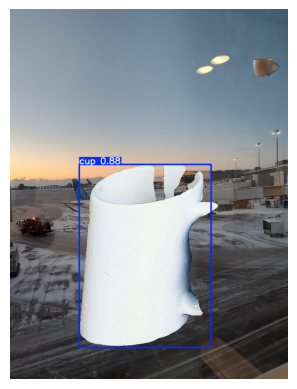

In [4]:
# Perform object detection on an image
results = model("C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/augmented_backgrounds/output/aug_IMG_20250207_041643252_HDR.jpg")
#results[0].show()
display_annotated_image(results)


image 1/1 C:\Users\admin\OneDrive - University of Waterloo\SYDE750\projectDVCStorage\edge_cases\Lid_1.jpg: 1024x768 1 cup, 52.1ms
Speed: 8.8ms preprocess, 52.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 768)


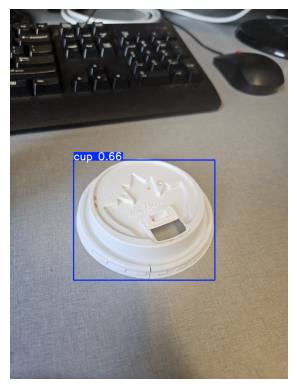

In [12]:

# Perform object detection on an image
results = model("C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/edge_cases/Lid_1.jpg")
#results[0].show()

display_annotated_image(results)

In [ ]:
from ultralytics import YOLO

# Load your trained model (adjust the path as needed)
model = YOLO("C:/Users/admin/OneDrive - University of Waterloo/SYDE750/projectDVCStorage/Timmies/train3/weights/best.pt")

# Evaluate on the test set. Ensure that your YAML file (e.g. "timmies_dataset.yaml") defines the test split.
metrics = model.val(split="test", data="timmies_dataset.yaml", imgsz=640, save = True, name='train3 test eval')

# Print out the key statistics
print("Test Set Evaluation:")
print(f"mAP50-95: {metrics.box.map:.4f}")  # mAP over IoU thresholds 0.5 to 0.95
print(f"mAP50: {metrics.box.map50:.4f}")     # mAP at IoU 0.5
print(f"Precision: {metrics.box.p.mean():.4f}")
print(f"Recall: {metrics.box.r.mean():.4f}")

